In [53]:
import pandas as pd
import constants as const


df = pd.read_pickle(const.JOURNALS_DF)
df_topics = pd.read_csv(const.CLEAN_TOPICS_STM, low_memory=False)

In [54]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

data = np.array(df_topics.values[:, 1:])

In [55]:
import os
import pickle

X_embedded = pickle.load(open(const.TFIDF_EMBEDDING, "rb"))
y_pred = list(pickle.load(open(const.TFIDF_CLUSTERING, "rb")))

In [56]:
# data[0,0]
topics = np.argmax(data, axis=1)

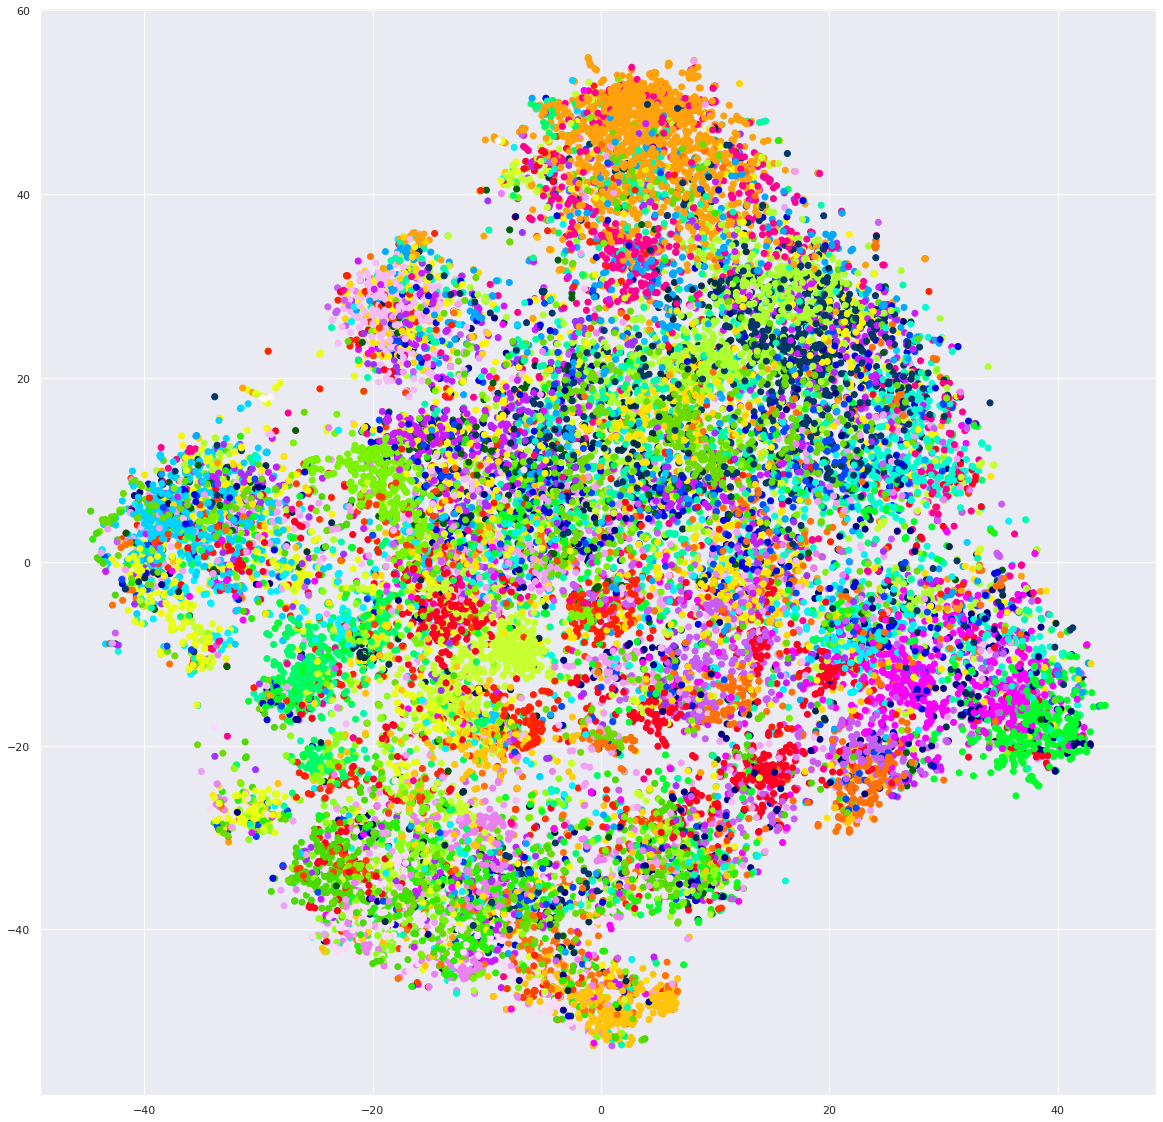

In [57]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

plt.figure(figsize=(20,20))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=topics, cmap="gist_ncar")

In [58]:
relevant_topics = np.argsort(data, axis=1)[:,:2:-1][:,:2]

topics = []
props = []

for n, a in enumerate(relevant_topics):
    topics.append(list(a))
    props.append(list(data[n, a]))

# data[relevant_topics[:,0]]
# for topics, props in zip(df["lda:topics"], df["lda:topics:props"]):

In [65]:
df = df[~df[const.ABSTRACTS].isna()]

df["stm:topics"] = pd.Series(topics, index=df.index)
df["stm:topics:probs"] = pd.Series(props, index=df.index)

In [66]:
from os.path import join

pd.to_pickle(df, join(const.ARTIFACTS_DIR, "journals-with-stm-topics.pkl"))

In [84]:
pca = PCA(n_components=40)
X_pca = pca.fit_transform(data)

In [85]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_pca)

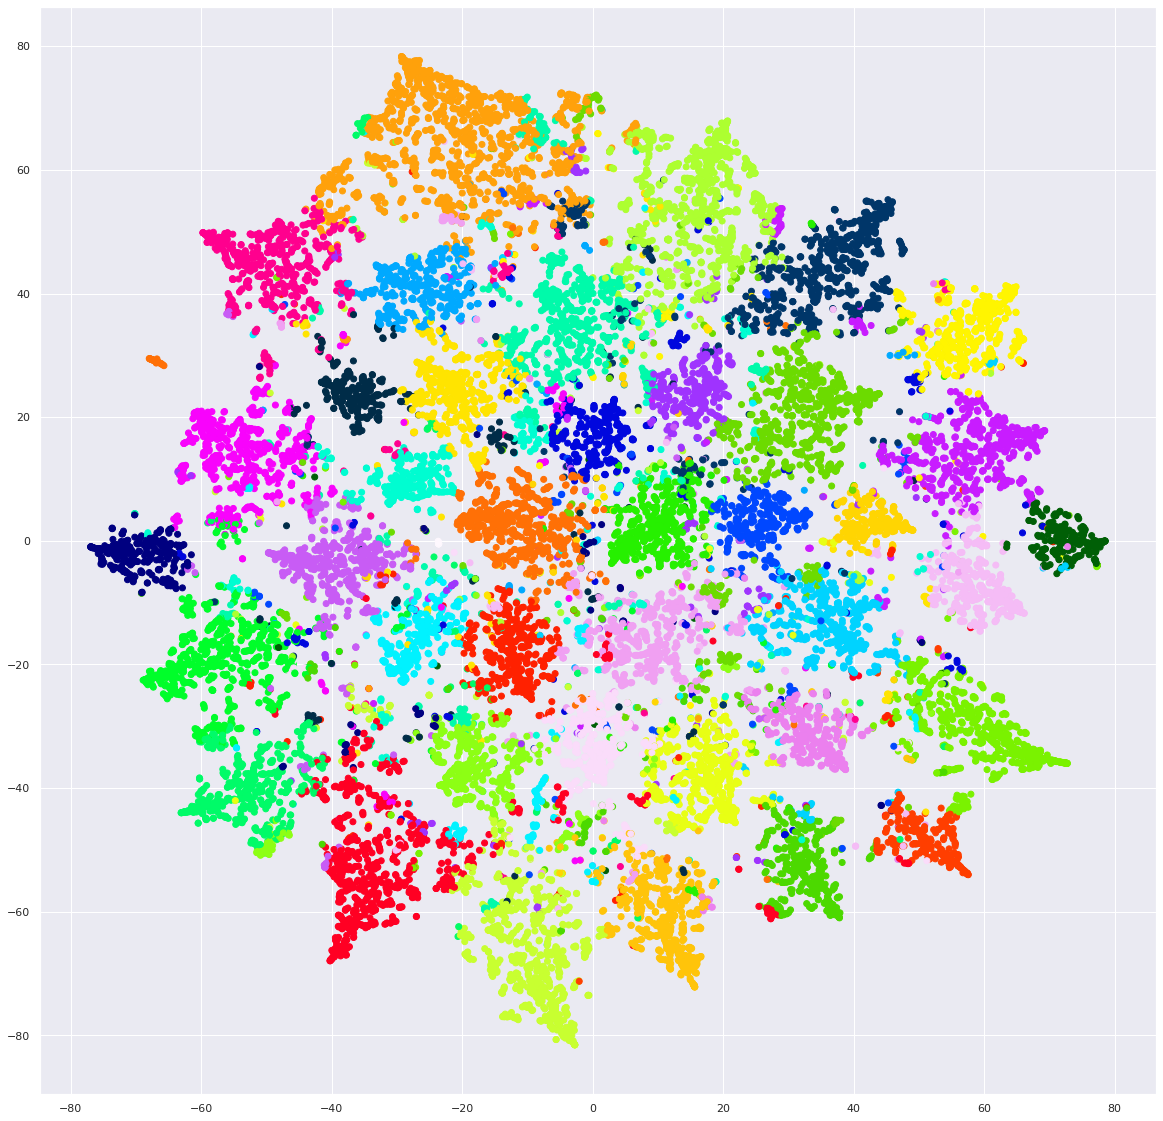

In [86]:
plt.figure(figsize=(20,20))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=[topic[0] for topic in topics], cmap="gist_ncar")

In [88]:
with open(join(const.BOKEH_DIR, "X-embedding-stm-tfidf.pkl"), "wb") as f:
    pickle.dump(X_tsne, f)